## Introduction

''' Natural Language Processing is wide field as we know before,Here we are discussing about basic applications of NLP That is Sentiment Analysis on Twitter data which is popular evry one.
we will take up an extremely popular use case of NLP - building a supervised machine learning model on text data.

## Probelem Statement 

 The problem in sentiment analysis is classifyingthe polarity of a given text at the document,sentence, or feature/aspect level 
 
 ● To predict whether the expressed opinion in a document, asentence or an entity feature/aspect is positive,negative, or   
   neutral .
 
 ● To implement an algorithm for automaticclassification of text into positive, negative or neutral.

## Dataset 

- tweet.csv

Here we are taking a open data that have collection of tweets and that is the only column we have.
Our dataset size is around (31962, 2)

### Importing necessory libraries 

In [1]:
import pandas as pd 
import string 
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline 

### Getting the data

In [61]:
df = pd.read_csv('tweet.csv')
print(df.shape)
df.head()

(31962, 2)


,id,tweet
0,1,@user when a father is dysfunctional and is s...
1,2,@user @user thanks for #lyft credit i can't us...
2,3,bihday your majesty
3,4,#model i love u take with u all the time in ...
4,5,factsguide: society now #motivation


Here we ca see our data include so many Non-ASCII characters and other special charecters so we have to get ride all of that.

### Applying function to remove Non-ASCII characters 
 -  with "string.printable" function 

In [62]:
df['tweet']=df['tweet'].apply(lambda y: ''.join(filter(lambda x: 
            x in string.printable, y)))

In [63]:
df.head()

,id,tweet
0,1,@user when a father is dysfunctional and is s...
1,2,@user @user thanks for #lyft credit i can't us...
2,3,bihday your majesty
3,4,#model i love u take with u all the time in ...
4,5,factsguide: society now #motivation


### Data cleaning 

In [64]:
  def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub(" (@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split()) 

In [65]:
df['tweet']=df['tweet'].apply(clean_tweet)

In [66]:
df.head()

,id,tweet
0,1,when a father is dysfunctional and is so selfi...
1,2,user thanks for lyft credit i can t use cause ...
2,3,bihday your majesty
3,4,model i love u take with u all the time in ur
4,5,factsguide society now motivation


In [67]:
df['tweet'][0]

'when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run'

Now our data look more sexy than before we can go for further steps with this data 

## Sentiment Analysis

 Here we will calculate polarity of each sentence and based on the polarity give them the labels wheather its Positive,Negative or Neutral

In [68]:
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(tweet) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

In [69]:
df['Labels']=df['tweet'].apply(get_tweet_sentiment)

In [70]:
df.head()

,id,tweet,Labels
0,1,when a father is dysfunctional and is so selfi...,negative
1,2,user thanks for lyft credit i can t use cause ...,positive
2,3,bihday your majesty,neutral
3,4,model i love u take with u all the time in ur,positive
4,5,factsguide society now motivation,neutral


## Get the occurance of sentiment

 Let us check the distribution of the target class which can be done using barplot.groups the 'Labels' variables by counting the number of their occurrences. It is evident that we have more occurrences of 'Positive' than 'Negative and Neutral' in the target variable. Still, the good thing is that the difference is not significant and the data is relatively balanced.

The baseline accuracy is important but often ignored in machine learning. It sets the benchmark in terms of minimum accuracy which the model should achieve.

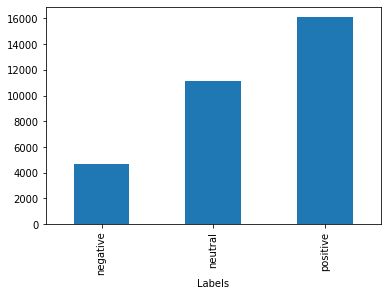

0.6257430698955009


In [71]:
df.groupby('Labels').tweet.count().plot.bar(ylim=0)
plt.show()
print(20000/31962) #Baseline accuracy

Our baseline accuracy is 62.5%

## Cleaning data with NLTK
 
 Here we will do some additional data cleaning using NLTK to get good data for our classification problem.
 Here we used Stemmming , Stop word removing and regular expression  

In [72]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()
words = stopwords.words("english")


In [73]:
df.head()

,id,tweet,Labels
0,1,when a father is dysfunctional and is so selfi...,negative
1,2,user thanks for lyft credit i can t use cause ...,positive
2,3,bihday your majesty,neutral
3,4,model i love u take with u all the time in ur,positive
4,5,factsguide society now motivation,neutral


In [74]:
df['Tweets'] = df['tweet'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).
                                                         split() if i not in words]).lower())

In [75]:
df=df.drop(['tweet'],axis=1)

In [76]:
df.head()

,id,Labels,Tweets
0,1,negative,father dysfunct selfish drag kid dysfunct run
1,2,positive,user thank lyft credit use caus offer wheelcha...
2,3,neutral,bihday majesti
3,4,positive,model love u take u time ur
4,5,neutral,factsguid societi motiv


Now our data is well cleaned

## Creating an ML model to get a prediction on our train data 

In [80]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

### Splitig the data 

We have already imported necessory pakages to split our data into train and test.

we are creating an array of the target variable, called 'target'.


Then we are creating the training (X_train, y_train) and test set (X-test, y_test) arrays. It keeps 30% of the data for testing the model. The 'random_state' argument ensures that the results are reproducible.

In [79]:
target = df['Labels']

X_train, X_test, y_train, y_test = train_test_split(df['Tweets'], target, test_size=0.30, random_state=100)

print(df.shape); print(X_train.shape); print(X_test.shape)

(31962, 3)
(22373,)
(9589,)


### Converting Text to Word Frequency Vectors with Tf-Idf Vectorizer.

 We have processed the text, but we need to convert it to word frequency vectors for building machine learning models. There are several ways to do this, such as using CountVectorizer and HashingVectorizer, but the TfidfVectorizer is the most popular one.

TF-IDF is an acronym that stands for 'Term Frequency-Inverse Document Frequency'. It is used as a weighting factor in text mining applications.


Term Frequency (TF): This summarizes the normalized Term Frequency within a document.


Inverse Document Frequency (IDF): This reduces the weight of terms that appear a lot across documents. In simple terms, TF-IDF attempts to highlight important words which are frequent in a document but not across documents. We will work on creating TF-IDF vectors for our documents.

In [81]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))

test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))

print(vectorizer_tfidf.get_feature_names()[:10])

['aa', 'aaa', 'aaaaa', 'aaaaaand', 'aaaaah', 'aaahh', 'aaand', 'aaawwwww', 'aaberg', 'aah']


In [82]:
print(train_tfIdf.shape); print(test_tfIdf.shape)

(22373, 24946)
(9589, 24946)


## Create and Fit the Classifier.
Now, we will build the text classification model. Here i'll try 4 types of text classification models 


- Naive Bayes classifier
- Random Forest Classifier
- support vector machines(SVM)
- Logistic regression

And we will see which model will give us the best prediction accuracy 

In [83]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()

### Naive Bayes classifier

In [84]:

nb_classifier.fit(train_tfIdf, y_train)

pred2 = nb_classifier.predict(test_tfIdf) 
print(pred2[:10])

['neutral' 'neutral' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive']


#### Computing the Evaluation Metrics


In [85]:
# Calculate the accuracy score: score
accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
print(accuracy_tfidf)

Conf_metrics_tfidf = metrics.confusion_matrix(y_test, pred2, labels=['positive', 'neutral' , 'negative'])
print(Conf_metrics_tfidf)

0.6429241839607884
[[4709  120    3]
 [2157 1228    6]
 [ 970  168  228]]


We have 64.3% in naive_bayes classifier 

###  Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [87]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 50)

classifier.fit(train_tfIdf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [88]:
predRF = classifier.predict(test_tfIdf) 
print(predRF[:10])

['neutral' 'neutral' 'positive' 'positive' 'negative' 'positive' 'neutral'
 'positive' 'positive' 'neutral']


In [89]:
# Calculate the accuracy score
accuracy_RF = metrics.accuracy_score(y_test, predRF)
print(accuracy_RF)

0.8590051100219


#### Computing the Evaluation Metrics


In [90]:

Conf_metrics_RF = metrics.confusion_matrix(y_test, predRF, labels=['positive', 'neutral', 'negative'])
print(Conf_metrics_RF)

[[4216  489  127]
 [ 177 3153   61]
 [ 210  288  868]]


### SVM( support vector machine)

In [91]:
from sklearn import svm


In [92]:
clf = svm.SVC(kernel='linear')

In [93]:
clf.fit(train_tfIdf, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [95]:
#Predict the response for test dataset
y_pred = clf.predict(test_tfIdf)
y_pred

array(['neutral', 'neutral', 'positive', ..., 'neutral', 'negative',
       'positive'], dtype=object)

In [96]:
# Calculate the accuracy score
accuracy_RF = metrics.accuracy_score(y_test, y_pred)
print(accuracy_RF)

0.8721451663364271


### Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [99]:
# fit the model with data
logreg.fit(train_tfIdf,y_train)

C:\Users\jonit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jonit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
y_predi=logreg.predict(test_tfIdf)

In [103]:
y_pred

array(['neutral', 'neutral', 'positive', ..., 'neutral', 'negative',
       'positive'], dtype=object)

In [104]:
# Calculate the accuracy score
accuracy_RF = metrics.accuracy_score(y_test, y_predi)
print(accuracy_RF)

0.8507665032850141


## Conclusion 

Here you have learned the fundamentals of text cleaning and pre-processing, and building and evaluating text classification models using Naive Bayes, Random Forest,Logistic reggression and SVM Algorithms. The performance of the models is summarized below:

Base line accuracy = 52.5%

Accuracy achieved by Naive Bayes Classifier = 54.3%
 
Accuracy achieved by Random Forest Classifier = 86%

Accuracy achieved by SVM( support vector machine) = 87.2

Accuracy achieved by LogisticRegression = 85.07%

As we know our problem statement was to predict whether the expressed opinion in a document, asentence or an entity feature/aspect is positive,negative, or neutral. I have tried four types of ML classificatio models So i can see  that our SVM model is giving more accurate prediction on our tweets.

